# Einlesen der Excel-Dateien
Die Excel-Dateien können mit Hilfe der [read_excel-Funktion der Pandas-Bibliothek](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) eingelesen werden.

* Die für uns interessanten Messdaten befinden sich in allen Excel-Dateien nur in der 4. bis 6. Tabelle:  
siehe Variable `sheetNumbers = [3, 4, 5]` (ja, in der Informatik fängt man beim Zählen gerne bei 0 an...) und Parameter `sheet_name=sheetNumbers`

* Die eigentlichen Daten finden sich immer erst ab der 4. Zeile:  
siehe Parameter `skiprows=3`

In [1]:
import pandas as pd

fileNames = ["Com_00_3.1_m", "Com_00_34_m1", "Com_40_3.1_m", "Com_80_3.1_m", "V2A_00_31_m1", "V2A_40_31_m1", "V2A_80_31_m1"]
sheetNumbers = [3, 4, 5]

files=[]
for fileName in fileNames:
    files.append(pd.read_excel(fileName + ".xlsx", sheet_name=sheetNumbers, skiprows=3, header=None))

# Daten bearbeiten

Wir nehmen folgende Überarbeitung der eingelesenen Daten vor:
* alle Werte in der Spalte "Standardkraft" werden durch 1000 dividiert
* alle Werten in den letzten vier Spalten werden negiert
* zwei neue Spalten mit den mittleren Abweichungen für die "top"- und "base"-Werte werden hinzugefügt

In [2]:
# column indices
forceColumnIndex     = 1
frontTopColumnIndex  = 4
backTopColumnIndex   = 5
frontBaseColumnIndex = 6
backBaseColumnIndex  = 7

# the functions we want to apply
def thousandth (a): return a / 1000
def negate(a): return -a
def mean(a, b): return (a + b) / 2

for file in files:
    for sheetNumber in sheetNumbers:
        sheet = file[sheetNumber]
        
        # divide all force values by 1000
        sheet[forceColumnIndex] = sheet.apply(lambda x: thousandth(x[forceColumnIndex]), axis="columns")
        
        # negate the values in the last 4 columns
        sheet[frontTopColumnIndex] = sheet.apply(lambda x: negate(x[frontTopColumnIndex]), axis="columns")
        sheet[backTopColumnIndex] = sheet.apply(lambda x: negate(x[backTopColumnIndex]), axis="columns")
        sheet[frontBaseColumnIndex] = sheet.apply(lambda x: negate(x[frontBaseColumnIndex]), axis="columns")
        sheet[backBaseColumnIndex] = sheet.apply(lambda x: negate(x[backBaseColumnIndex]), axis="columns")
        
        # add custom "mean" series
        sheet['mean top']  = sheet.apply(lambda x: mean(x[frontTopColumnIndex],  x[backTopColumnIndex]),  axis="columns")
        sheet['mean base'] = sheet.apply(lambda x: mean(x[frontBaseColumnIndex], x[backBaseColumnIndex]), axis="columns")

# Daten plotten
Hier stellen wir die Daten mit [matplotlib](https://matplotlib.org) dar:

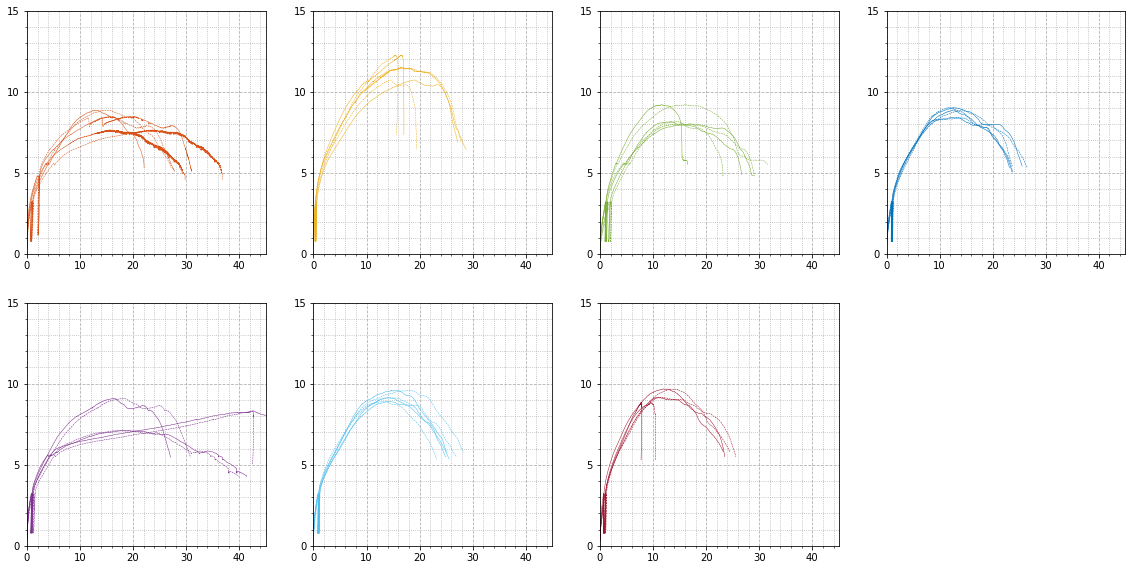

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# colors given in MATLAB example
colors= [ (0.8500, 0.325, 0.098), (0.929, 0.694, 0.125), (0.4660, 0.6740, 0.1880), (0, 0.4470, 0.7410), (0.4940, 0.1840, 0.5560), (0.3010, 0.7450, 0.9330), (0.6350, 0.0780, 0.1840) ]

cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2, 4, figsize=(50*cm, 25*cm))
axs = axs.flatten()
for i in range(len(files)):
    file = files[i]
    for sheetNumber in sheetNumbers:
        sheet = file[sheetNumber]
        
        # plot values
        axs[i].plot(sheet[frontTopColumnIndex], sheet[forceColumnIndex], color=colors[i], linewidth=0.5, linestyle="solid");
        axs[i].plot(sheet[backTopColumnIndex],  sheet[forceColumnIndex], color=colors[i], linewidth=0.5, linestyle="dashed");
        
        # set dimensions and grid
        axs[i].axis(xmin=0, xmax=45, ymin=0, ymax=15)
        axs[i].xaxis.set_major_locator(MultipleLocator(10))
        axs[i].yaxis.set_major_locator(MultipleLocator(5))
        axs[i].xaxis.set_minor_locator(AutoMinorLocator(5))
        axs[i].yaxis.set_minor_locator(AutoMinorLocator(5))
        axs[i].grid(which='major', linestyle='--')
        axs[i].grid(which='minor', linestyle=':')

axs[7].axis('off')
plt.show
pass